In [ ]:
################################################# SpeakX Assignment ############################################################

In [1]:
# FIRST WE WILL IMPORT THE DATA :
import pandas as pd 
data = pd.read_csv(r"C:\Users\20001\OneDrive\Documents\SpeakX\WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.head()  ## it will print first 5 rows of our data.

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
## labeling the categorical data :
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder() 

data["Partner"]=label.fit_transform(data["Partner"])
data["PhoneService"]=label.fit_transform(data["PhoneService"])
data["MultipleLines"]=label.fit_transform(data["MultipleLines"])
data["InternetService"]=label.fit_transform(data["InternetService"])
data["OnlineSecurity"]=label.fit_transform(data["OnlineSecurity"])
data["OnlineBackup"]=label.fit_transform(data["OnlineBackup"])
data["DeviceProtection"]=label.fit_transform(data["DeviceProtection"])
data["TechSupport"]=label.fit_transform(data["TechSupport"])
data["StreamingTV"]=label.fit_transform(data["StreamingTV"])
data["StreamingMovies"]=label.fit_transform(data["StreamingMovies"])
data["Contract"]=label.fit_transform(data["Contract"])
data["Churn"]=label.fit_transform(data["Churn"])
data["gender"]=label.fit_transform(data["gender"])
data["Dependents"]=label.fit_transform(data["Dependents"])
data["PaymentMethod"]=label.fit_transform(data["PaymentMethod"])
data["PaperlessBilling"]=label.fit_transform(data["PaperlessBilling"])
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [ ]:
# NOW WE WILL PERFORM EDA ON OUR DATA :

In [43]:
## finding statistical measures for our data
data.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.504693,0.162400,0.482509,0.298493,32.421786,0.903299,0.940557,0.872582,0.789249,0.905859,0.903868,0.796359,0.984926,0.992890,0.688567,0.592719,1.573237,64.798208,2283.300441,0.265785
std,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.948627,0.737271,0.859962,0.880394,0.880178,0.861674,0.885285,0.885385,0.832934,0.491363,1.067504,30.085974,2266.771362,0.441782
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.587500,401.450000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1397.475000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.862500,3794.737500,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


In [44]:
## names of our columns :
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [45]:
## now we are finding the unique values for each column of our data :
data.nunique()

customerID          7032
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

In [46]:
## now we will the presence of null values in our data :
data.isnull().sum()
### since there are no missing values in our dataset we do not need to drop any rows from our data.

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [4]:
# PERFORMING RELATIONSHIP ANALYSIS :-

data.corr()

C:\Users\20001\AppData\Local\Temp\ipykernel_17472\2791374330.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001819,-0.001379,0.010349,0.005285,-0.007515,-0.006908,-0.002236,-0.014899,-0.011920,0.001348,-0.006695,-0.005624,-0.008920,0.000095,-0.011902,0.016942,-0.013779,0.000048,-0.008545
SeniorCitizen,-0.001819,1.000000,0.016957,-0.210550,0.015683,0.008392,0.146287,-0.032160,-0.127937,-0.013355,-0.021124,-0.151007,0.031019,0.047088,-0.141820,0.156258,-0.038158,0.219874,0.102411,0.150541
Partner,-0.001379,0.016957,1.000000,0.452269,0.381912,0.018397,0.142717,0.000513,0.150610,0.153045,0.165614,0.126488,0.136679,0.129907,0.294094,-0.013957,-0.156232,0.097825,0.319072,-0.149982
Dependents,0.010349,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.024975,0.044030,0.151198,0.090231,0.079723,0.132530,0.046214,0.022088,0.240556,-0.110131,-0.041989,-0.112343,0.064653,-0.163128
tenure,0.005285,0.015683,0.381912,0.163386,1.000000,0.007877,0.343673,-0.029835,0.327283,0.372434,0.372669,0.324729,0.290572,0.296785,0.676734,0.004823,-0.370087,0.246862,0.825880,-0.354049
PhoneService,-0.007515,0.008392,0.018397,-0.001078,0.007877,1.000000,-0.020504,0.387266,-0.014163,0.024040,0.004718,-0.018136,0.056393,0.043025,0.003019,0.016696,-0.005499,0.248033,0.113008,0.011691
MultipleLines,-0.006908,0.146287,0.142717,-0.024975,0.343673,-0.020504,1.000000,-0.108849,0.007306,0.117276,0.122614,0.010941,0.175403,0.181705,0.111029,0.165306,-0.176598,0.433905,0.453202,0.038043
InternetService,-0.002236,-0.032160,0.000513,0.044030,-0.029835,0.387266,-0.108849,1.000000,-0.028003,0.036735,0.045558,-0.025626,0.108190,0.097967,0.099579,-0.138166,0.084504,-0.322173,-0.175691,-0.047097
OnlineSecurity,-0.014899,-0.127937,0.150610,0.151198,0.327283,-0.014163,0.007306,-0.028003,1.000000,0.184942,0.175789,0.284875,0.044399,0.056313,0.373980,-0.157723,-0.096593,-0.053576,0.254473,-0.289050
OnlineBackup,-0.011920,-0.013355,0.153045,0.090231,0.372434,0.024040,0.117276,0.036735,0.184942,1.000000,0.187646,0.195581,0.147085,0.137083,0.280617,-0.012697,-0.125534,0.119943,0.375556,-0.195290


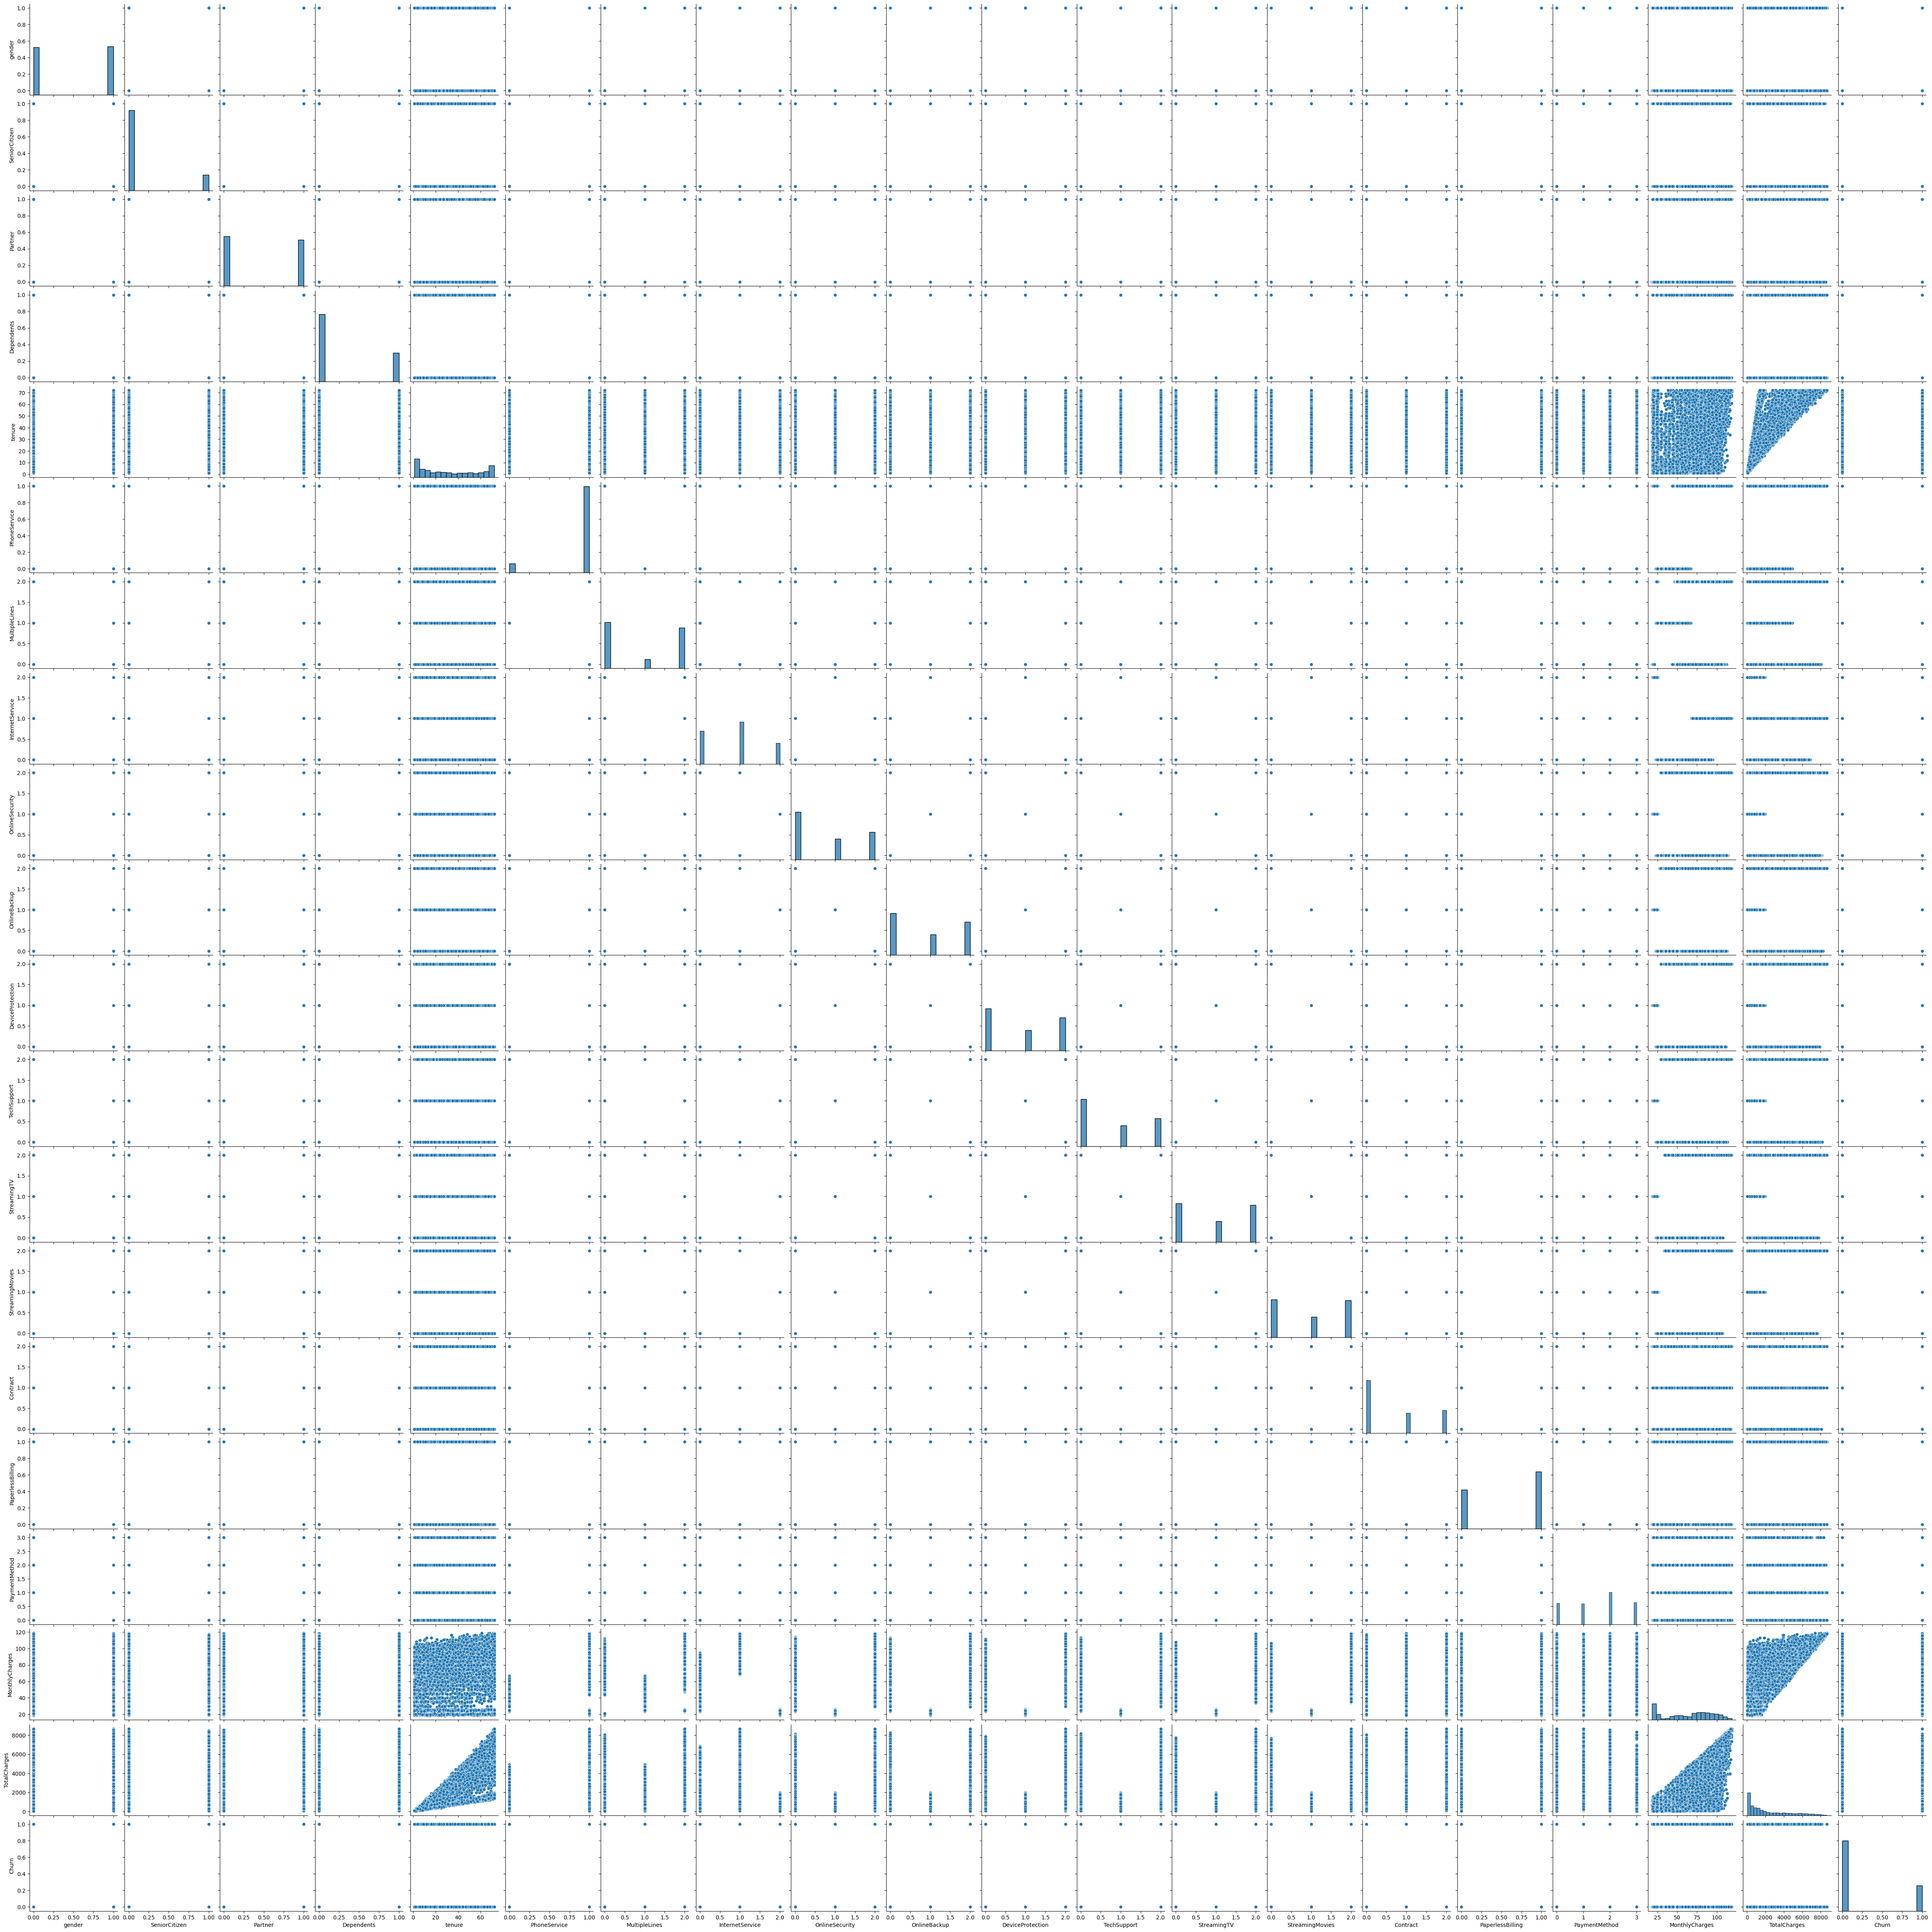

In [48]:
# PLOTTING PAIRPLOT :
import seaborn as sns
sns.pairplot(data)

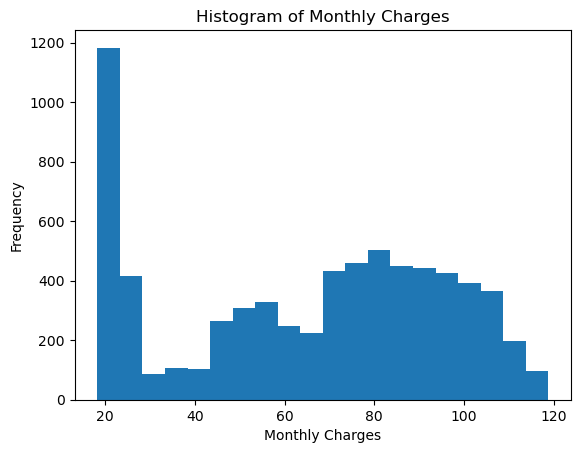

In [37]:
# VISUALIZATION OF MONTHLY CHARGES USING HISTOGRAM :
import matplotlib.pyplot as plt
plt.hist(data["MonthlyCharges"],20)
plt.xlabel("Monthly Charges")
plt.ylabel("Frequency")
plt.title("Histogram of Monthly Charges")
plt.show()

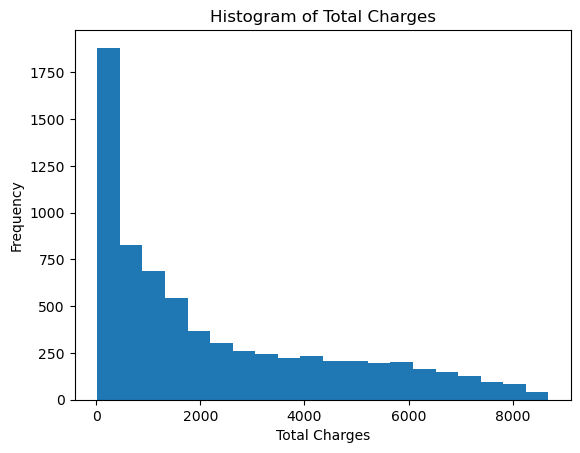

In [38]:
# VISUALIZATION OF TOTAL CHARGES USING HISTOGRAM :
import matplotlib.pyplot as plt
plt.hist(data["TotalCharges"],20)
plt.xlabel("Total Charges")
plt.ylabel("Frequency")
plt.title("Histogram of Total Charges")
plt.show()

In [9]:
## now we will drop the such columns which are not relevant to our taget column i.e. churn :

### by analysing the data and correlation matrix we see that our target columnmm is not much correlated with certain columns.
### so we will drop this columns :
data=data.drop(["gender","PhoneService","MultipleLines","InternetService","SeniorCitizen","PaperlessBilling","customerID"],axis="columns")
data

,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,2,0,0,0,0,0,2,29.85,29.85,0
1,0,0,34,2,0,2,0,0,0,1,3,56.95,1889.50,0
2,0,0,2,2,2,0,0,0,0,0,3,53.85,108.15,1
3,0,0,45,2,0,2,2,0,0,1,0,42.30,1840.75,0
4,0,0,2,0,0,0,0,0,0,0,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,1,1,24,2,0,2,2,2,2,1,3,84.80,1990.50,0
7028,1,1,72,0,2,2,0,2,2,1,1,103.20,7362.90,0
7029,1,1,11,2,0,0,0,0,0,0,2,29.60,346.45,0
7030,1,0,4,0,0,0,0,0,0,0,3,74.40,306.60,1


In [10]:
# NOW WE WILL DO THE SCALING OF PARTICULAR COLUMNS :
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

scaler.fit(data[["tenure"]])
data["tenure"]=scaler.transform(data[["tenure"]])

scaler.fit(data[["MonthlyCharges"]])
data["MonthlyCharges"]=scaler.transform(data[["MonthlyCharges"]])

scaler.fit(data[["TotalCharges"]])
data["TotalCharges"]=scaler.transform(data[["TotalCharges"]])

data

,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,0.000000,0,2,0,0,0,0,0,2,0.115423,0.001275,0
1,0,0,0.464789,2,0,2,0,0,0,1,3,0.385075,0.215867,0
2,0,0,0.014085,2,2,0,0,0,0,0,3,0.354229,0.010310,1
3,0,0,0.619718,2,0,2,2,0,0,1,0,0.239303,0.210241,0
4,0,0,0.014085,0,0,0,0,0,0,0,2,0.521891,0.015330,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,1,1,0.323944,2,0,2,2,2,2,1,3,0.662189,0.227521,0
7028,1,1,1.000000,0,2,2,0,2,2,1,1,0.845274,0.847461,0
7029,1,1,0.140845,2,0,0,0,0,0,0,2,0.112935,0.037809,0
7030,1,0,0.042254,0,0,0,0,0,0,0,3,0.558706,0.033210,1


In [11]:
# DIFFRENTIATING THE DATA INTO INPUT AND TARGET VARIABLE :
input=data.drop("Churn",axis="columns")
input.head()

,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,MonthlyCharges,TotalCharges
0,1,0,0.000000,0,2,0,0,0,0,0,2,0.115423,0.001275
1,0,0,0.464789,2,0,2,0,0,0,1,3,0.385075,0.215867
2,0,0,0.014085,2,2,0,0,0,0,0,3,0.354229,0.010310
3,0,0,0.619718,2,0,2,2,0,0,1,0,0.239303,0.210241
4,0,0,0.014085,0,0,0,0,0,0,0,2,0.521891,0.015330


In [12]:
target=data["Churn"]
target.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int32

In [13]:
# SPLITTING THE DATA INTO TRAIN AND TEST :

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(input,target,test_size=0.2) 
## 0.2 means we are taking 20 percent data for testing.

In [14]:
# BUILDING THE RANDOM FOREST MODEL :
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()

In [15]:
# FITTING THE MODEL :
model.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
# CHECKING THE PRESION OF OUR MODEL BY USING VARIOUS METRICS :-

In [16]:
# R2 SCORE :
model.score(X_test,y_test)

0.7924662402274343

Text(70.72222222222221, 0.5, 'Truth')

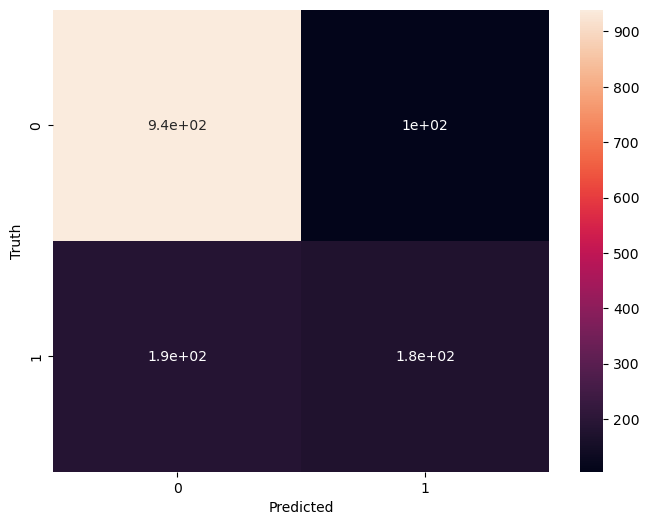

In [19]:
# CONFUSION MATRIX :

y_predicted=model.predict(X_test)

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predicted)

import seaborn as sns
%matplotlib inline  
# by using these we do not need to write the command for showing the graph again and again 
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True) 
# annot will show the correlation value inside the confusion matrix.
plt.xlabel("Predicted")
plt.ylabel("Truth")